In [4]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Create some toy data

In [7]:
# create 3 classes which are not linearly separatable
r = np.tile(np.r_[0:1:100j], 3)
t = np.r_[0:np.pi*8:300j] + np.random.rand(300)
x_train = np.c_[r*np.sin(t), r*np.cos(t)]
y_train = np.arange(3).repeat(100)

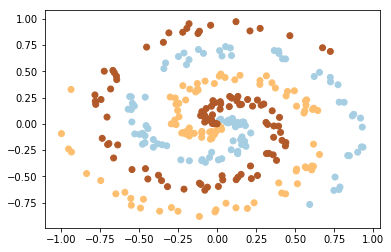

In [8]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=plt.cm.Paired)

## Define a Neural Network model

In [64]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_layer, num_classes):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_layer)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_layer, hidden_layer)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_layer, num_classes)
        
    def forward(self, X):
        out = self.fc1(X)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        
        return out
    
    def predict(self, X):
        if isinstance(X, np.ndarray):
            X = torch.from_numpy(X.astype(np.float32))
            out = self.forward(X)
            
            return torch.max(out, 1)[1]
        
    def plot_dicision_boundary(x_train, y_train):
        x1_min, x2_min = x_train.min(0) - 0.5
        x1_max, x2_max = x_train.max(0) + 0.5
        x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                             np.arange(x2_min, x2_max, 0.01))
        y = self.predict(np.c_[x1.ravel(), x2.ravel()])
        plt.pcolormesh(x1, x2, y.detach().numpy().reshape(x1.shape), cmap=plt.cm.Paired)
        plt.scatter(x_train[:,0], x_train[:,1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
        plt.show()
    
        

In [75]:
model = NeuralNet(2,128,3)

In [78]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

Loss is: 1.1013743877410889 at epoch 0


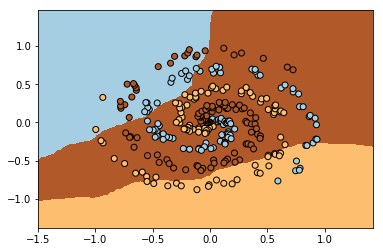

Loss is: 0.6722551584243774 at epoch 1000


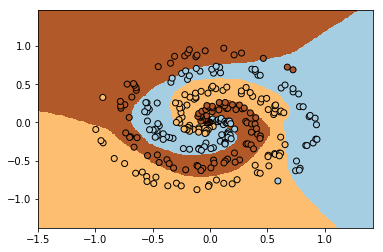

Loss is: 0.26591524481773376 at epoch 2000


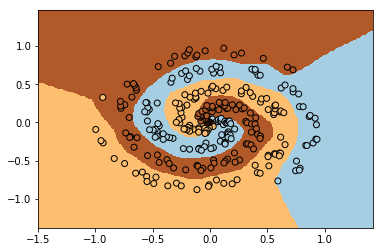

Loss is: 0.12495238333940506 at epoch 3000


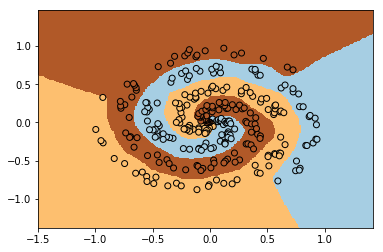

Loss is: 0.07197344303131104 at epoch 4000


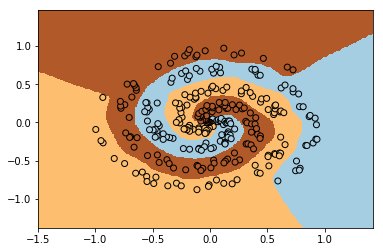

Loss is: 0.04652181640267372 at epoch 5000


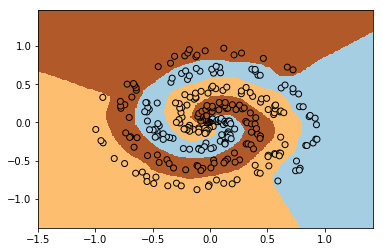

Loss is: 0.032049983739852905 at epoch 6000


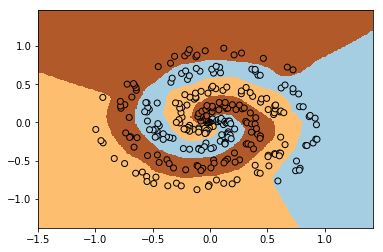

Loss is: 0.023368200287222862 at epoch 7000


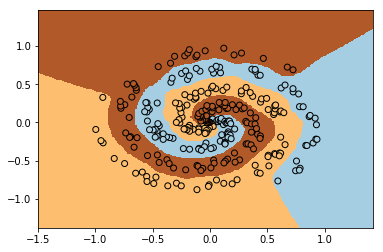

Loss is: 0.01847904548048973 at epoch 8000


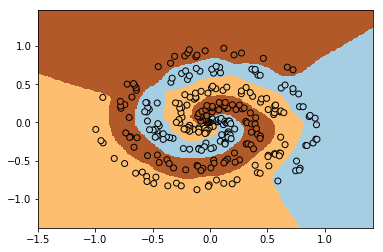

Loss is: 0.015442749485373497 at epoch 9000


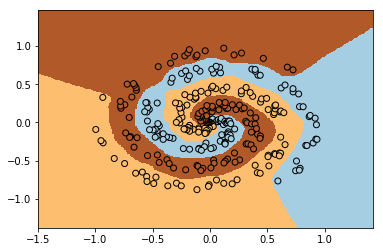

In [ ]:
for epoch in range(10001):
    y_score = model(torch.from_numpy(x_train.astype(np.float32)))
    optimizer.zero_grad()
    loss = loss_fn(y_score, torch.from_numpy(y_train.astype(np.int64)))
    loss.backward()
    optimizer.step()
    if epoch%1000==0:
        print(f'Loss is: {loss} at epoch {epoch}')
        plot_dicision_boundary(x_train, y_train, model)

In [63]:
def plot_dicision_boundary(x_train, y_train, model):
    x1_min, x2_min = x_train.min(0) - 0.5
    x1_max, x2_max = x_train.max(0) + 0.5
    x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                         np.arange(x2_min, x2_max, 0.01))
    y = model.predict(np.c_[x1.ravel(), x2.ravel()])
    plt.pcolormesh(x1, x2, y.detach().numpy().reshape(x1.shape), cmap=plt.cm.Paired)
    plt.scatter(x_train[:,0], x_train[:,1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
    plt.show()
    